# Corrections for Data Analysis with Python and Pandas (Lecture 21)

Lecture 21 of *Data Analysis with Python and Pandas* **(Section 4, Part 5)** is a great explanation of `pandas` support to perform mathematical operations in rolling windows but is using some deprecated code. This change report outlines two major updates and disclaimers that need to go into the code.

1.  Update import of `pandas.io.data as web` to `import pandas_datareader.data as web`
2.  Correct the code for a `pandas` Series rolling window

The first correction is a simple one. Trying to use this code:

```python
from pandas.io import data, wb
```

produces the following warning.


**(Hit down arrow on your keyboard).** 

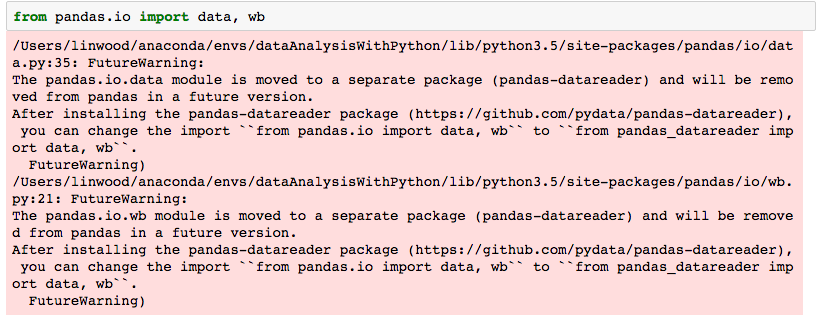

In [40]:
from IPython.display import Image
Image("./ioReaderWarning.png")

So this warning is about a module that is going away; since `pandas` is in version 18.1, we should change the import and add disclaimer text to the video.  


See solution --> **(Hit right arrow!)** <br>
See details about solution --> **(Hit down arrow!)** 


In future pandas releases (0.17+),`pandas.io.wb` is moved to pandas-datareader, which now a dependency (requires seperate install) and using pandas.io.data will be equivalent to using pandas_datareader.data.

# Here is the fix for the pandas.io.wb deprecation

**(Hit the right arrow on your keyboard)**

First, users must install pandas_datareader.  See the [github page for details](https://github.com/pydata/pandas-datareader), but it can be pip installed in this way:

```bash
pip install pandas-datareader
```

**(Hit the right arrow on your keyboard)**

Next, to transition this module to **Part 4, Section 5** of *Data Analysis with Python and Pandas*, the import is done in this way:

```python
import pandas_datareader.data as web
```

**(Hit the right arrow on your keyboard)**

The full code for this video will now look like this:

```python
import pandas as pd
import pandas_datareader.data as web
import datetime

import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

start = datetime.datetime(2005,1,1)
end = datetime.datetime(2015,1,1)

att = web.DataReader('T','yahoo',start,end)

```

**(Hit the right arrow on your keyboard)**

The next problem is fixing a syntax error in the disclaimer text on creating two new rolling window columns. Here is the disclaimer text in the video at 2 minutes and 21 seconds (2:21) of the 10 minute video:

**(Hit down arrow on your keyboard).** 

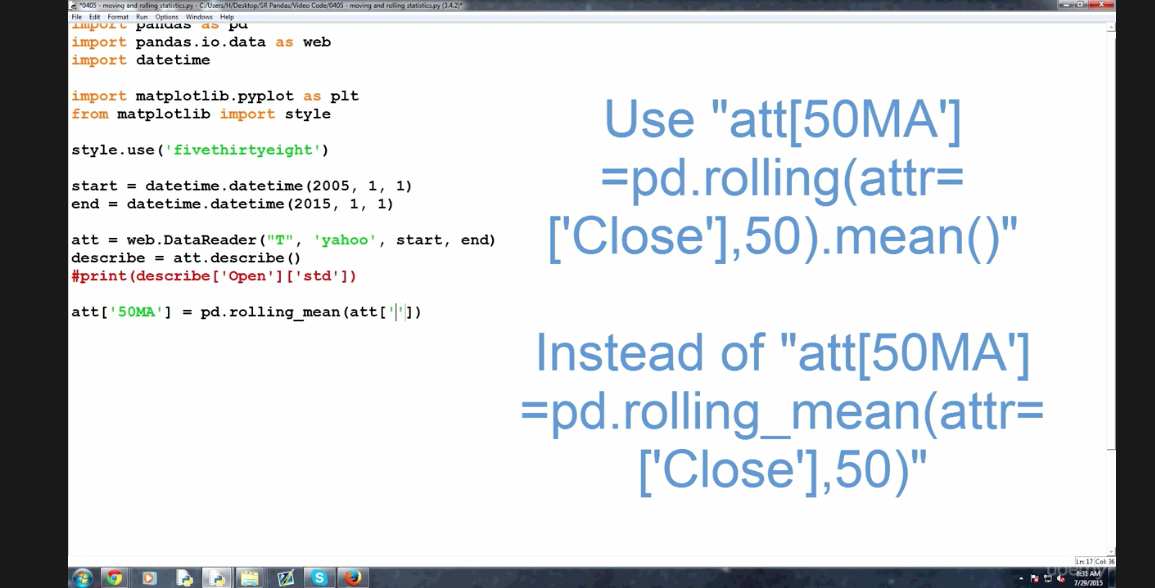

In [41]:
from IPython.display import Image
Image("./courseImage.png")

# So let's follow the disclaimer text's instruction to see the outcome. 

**(Hit right arrow!)**

In [42]:
# Here is the outcome of typing exactly what's in the disclaimer

# code as exactly written from disclaimer at 2:21 mark of video
att[50MA'] = pd.rolling(attr=['Close'],50).mean()
    
# output is SyntaxError: invalid syntax
    
# **(Hit right arrow!)**

SyntaxError: invalid syntax (<ipython-input-42-014e9ac0d221>, line 4)

In [43]:
# slightly corrected code, adding missing tick mark
att['50MA'] = pd.rolling(attr=['Close'],50).mean()  

# output is SyntaxError: positional argument follows keyword argument

# **(Hit right arrow!)**

SyntaxError: positional argument follows keyword argument (<ipython-input-43-d8a5d29b1960>, line 2)

Let's check the DataFrame just to see if we added our new columns.

**(Hit Down arrow!)**

In [44]:
# Checking to see if our dataframe has the new column; it's not there!

att.tail()

##  **(Hit right arrow!)**

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-12-24,34.020000,34.189999,33.930000,33.959999,8831900,30.936983
2014-12-26,34.049999,34.230000,33.980000,34.169998,11486800,31.128288
2014-12-29,34.070000,34.270000,34.020000,34.110001,12708100,31.073632
2014-12-30,34.090000,34.200001,34.029999,34.080002,12369700,31.046303
2014-12-31,33.980000,34.080002,33.540001,33.590000,24178100,30.599920


The new `50MA` column is not in our DataFrame

### The disclaimer code in the video has a syntax problem!!!

Hit the **down arrow** to see details on why this is a syntax problem.  Or, hit the **right arrow** to see the solution code and output.

See solution --> **(Hit right arrow!)** <br>
See details about solution --> **(Hit down arrow!)**



### Details on Problems with Disclaimer Code in Lecture 21 (Section 4, Part 5)

The disclaimer text at 2:21 suggests using a `pandas` parameter, **"attr="**, that does not exist in rolling window according to documentation for a [DataFrame rolling window](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html#pandas.DataFrame.rolling) or a [Series rolling window](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html#pandas.Series.rolling). 

The task at this part of the video is to create two new 50 and 10 day moving average rolling window columns (two `pandas` Series).  Here are the correct parameters for the `pandas` Series rolling window: 

**(Hit down arrow)**

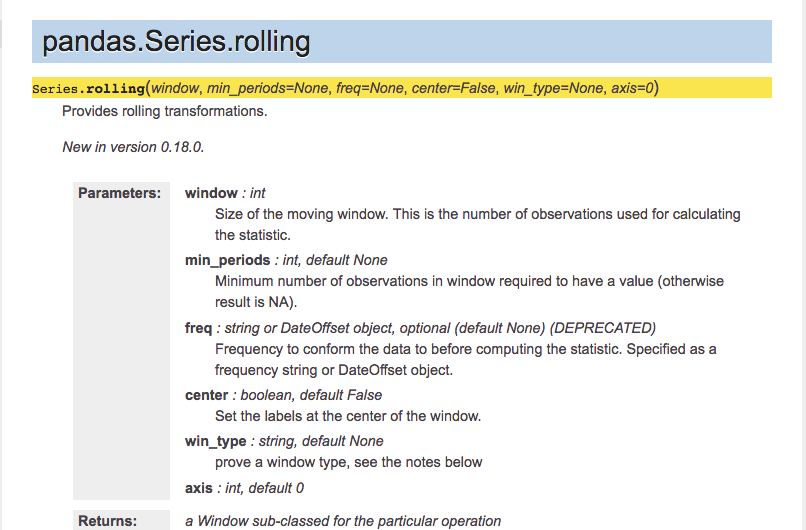

In [23]:
from IPython.display import Image
Image("./pandasDocsImage.png")

# Here is the corrected code

Based on the `pandas` documentation, this is how you create a new column witha 50 day moving average calculated mean.

**(Hit the Right arrow)**

In [25]:
# 50 day window
att['50MA'] = att['Close'].rolling(window=50).mean()

# 10 day window
att['10MA'] = att['Close'].rolling(window=10).mean()

# **(Hit the Right arrow)**

Now we show the `tail()` of the DataFrame to show that the new code worked.  

**(Hit Down Arrow)**

In [31]:
att.tail()

,Open,High,Low,Close,Volume,Adj Close,50MA,10MA
Date,,,,,,,,
2014-12-24,34.020000,34.189999,33.930000,33.959999,8831900,30.936983,34.2966,33.081999
2014-12-26,34.049999,34.230000,33.980000,34.169998,11486800,31.128288,34.3026,33.227999
2014-12-29,34.070000,34.270000,34.020000,34.110001,12708100,31.073632,34.3120,33.422999
2014-12-30,34.090000,34.200001,34.029999,34.080002,12369700,31.046303,34.3120,33.605999
2014-12-31,33.980000,34.080002,33.540001,33.590000,24178100,30.599920,34.2982,33.750999


# That's it!  

This synopsis explains why the disclaimer code at 2:21 in *Part 4, Section 5* of Stone River's **Data Analysis with Python and Pandas** creates a SyntaxError.  The `pandas` rolling window does not have an **"attr="** parameter, which is the reasone for the syntax error.  There was also a missing tick mark on the column create entry for, and the incorrect code is:

```python
att[50MA'] = pd.rolling(attr=['Close'],50).mean()
```

Using the `pandas` documentation, we found the correct code to be:

```python
att['50MA'] = att['Close'].rolling(window=50).mean()
```